### 2.5.1 一个简单的例子

In [236]:
import torch
from d2l import torch as d2l

In [237]:
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [238]:
x.requires_grad_(True)
x.grad

In [239]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [240]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [241]:
x.grad == 4 * x

tensor([True, True, True, True])

In [242]:
x.grad.zero_()
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

### 非标量变量的反向传播

In [243]:
x.grad.zero_()
y = x * x
y

tensor([0., 1., 4., 9.], grad_fn=<MulBackward0>)

In [29]:
y.backward(torch.tensor([1, 1, 1, 1]))
x.grad

tensor([0., 2., 4., 6.])

In [244]:
y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

### 2.5.3 分离计算

In [49]:
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x

z.sum().backward()
x.grad, u

(tensor([0., 1., 4., 9.]), tensor([0., 1., 4., 9.]))

In [50]:
x.grad.zero_()
y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

In [41]:
x.grad.zero_()
y = x * x
z = y * x

z.sum().backward()
x.grad, y

(tensor([ 0.,  3., 12., 27.]),
 tensor([0., 1., 4., 9.], grad_fn=<MulBackward0>))

### 2.5.4 Python控制流的梯度计算

In [80]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b *= 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

In [198]:
a = torch.randn([], requires_grad=True)
a

tensor(-0.0856, requires_grad=True)

In [199]:
d = f(a)
d.backward()
d

tensor(-140168.6406, grad_fn=<MulBackward0>)

In [200]:
a.grad, d / a

(tensor(1638400.), tensor(1638400., grad_fn=<DivBackward0>))

### 练习 (5)

In [280]:
p = torch.arange(0, 2 * torch.pi, 0.001, requires_grad=True)

In [281]:
q = torch.sin(p)
q.sum().backward()
df_dx = p.grad

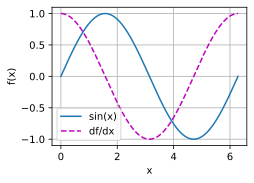

In [286]:
d2l.plot(p.detach().numpy(), [q.detach().numpy(), df_dx], 'x', 'f(x)', ['sin(x)', 'df/dx'])